/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


######## Dados socioeconômicos
PIB X Imposto de renda


<Figure size 640x480 with 0 Axes>

PIB X ICMS


<Figure size 640x480 with 0 Axes>

PIB X Imposto sobre Exportação


<Figure size 640x480 with 0 Axes>

PIB x Imposto sobre Importação


<Figure size 640x480 with 0 Axes>

PIB X Imposto sobre Operações Financeiras


<Figure size 640x480 with 0 Axes>

PIB X Imposto sobre Produtos Industrializados


<Figure size 640x480 with 0 Axes>

PIB X IPVA


<Figure size 640x480 with 0 Axes>

PIB X Imposto sobre a propriedade de território rural


<Figure size 640x480 with 0 Axes>

PIB X Outras Receitas Administradas


<Figure size 640x480 with 0 Axes>

######## Dados de desmatamento
PIB X Desmatamento


<Figure size 640x480 with 0 Axes>

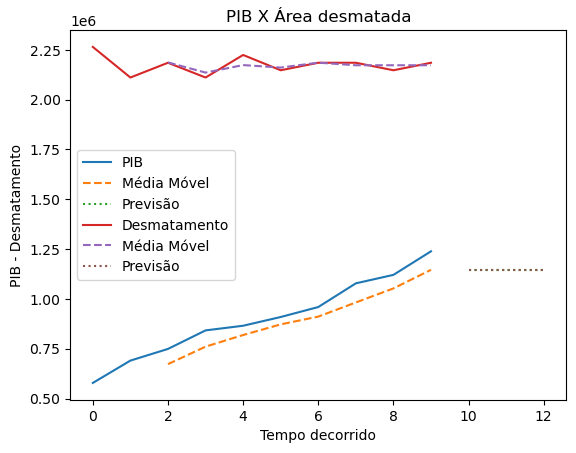

PIB per capita X Desmatamento


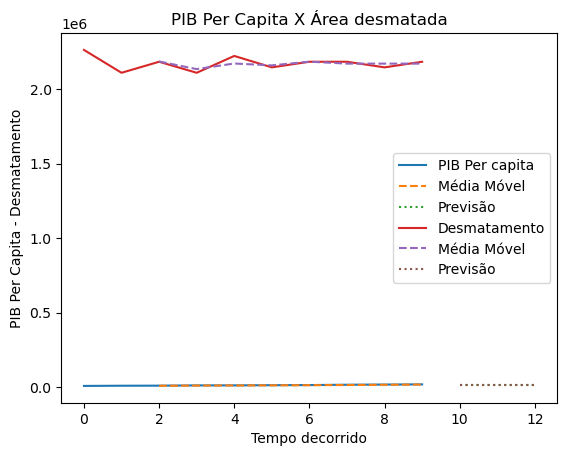

<Figure size 640x480 with 0 Axes>

In [1]:
#####################################################################################
# Esse notebook não tem funcionado com perfeição.
# Infelizmente não pude fazê-lo funcionar corretamente
# 
# Desenvolvido por Maicon Ribeiro
# Abril de 2024

from treinamento import funcoesDados
from treinamento import funcoesRna
from datetime import datetime
import time
import conexao
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt





def treinamento(X, y, descricaoX, descricaoY, nomeImagem, titulo="Titulo Gráfico", tipo='linha'):
    #buscando dados
    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinando o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = model.predict(X_test)
    

    if tipo == 'linha':
        plt.scatter(X_test, y_test, color='orange')
        plt.plot(X_test, y_pred, color='green', linewidth=3)
  
    if tipo == 'barras':
        arrayX = []
        arrayY = []
        for dadosX in X_test:
            #convertendo os números em limite de 100
            arrayX.append(dadosX[0]%100)
        for dadosY in y_pred:
            #convertendo os números em limite de 100
            arrayY.append(dadosY[0]%100)
        cor = ['#2971CA','#D6B56A']
        plt.bar(arrayX,arrayY,color=cor)

    plt.xlabel(descricaoX)
    plt.ylabel(descricaoY)
    plt.title(titulo)
    # plt.savefig(nomeImagem)
    plt.clf()
    plt.show()
    return 0




def graficoComPrevisao(dadosA, dadosB, descricaoA, descricaoB,descricaoX, nomeImagem, titulo, descricaoVertical, descricaoHorizontal):

	##### Primeira série de dados
	# Converter para DataFrame do Pandas
	df = pd.DataFrame(dadosA, columns=[descricaoA])
	# Calcular a média móvel
	janela = 3  # Tamanho da janela da média móvel
	df['Media_Movel'] = df[descricaoA].rolling(window=janela).mean()

	# Prever os próximos 'n' valores usando a última média móvel
	n = 3  # Número de valores a prever
	ultima_media_movel = df['Media_Movel'].iloc[-1]
	previsao = [ultima_media_movel] * n

	# Adicionar as previsões ao DataFrame
	indices_previsao = [df.index[-1] + i + 1 for i in range(n)]
	df_previsao = pd.DataFrame(previsao, index=indices_previsao, columns=['Previsao'])
	df = pd.concat([df, df_previsao])



	#####################################################################################
	##### Segunda série de dados
	# Converter para DataFrame do Pandas
	dfB = pd.DataFrame(dadosB, columns=[descricaoB])
	# Calcular a média móvel
	janela = 3  # Tamanho da janela da média móvel
	dfB['Media_Movel'] = dfB[descricaoB].rolling(window=janela).mean()

	# Prever os próximos 'n' valores usando a última média móvel
	n = 3  # Número de valores a prever
	ultima_media_movel = dfB['Media_Movel'].iloc[-1]
	previsao = [ultima_media_movel] * n

	# Adicionar as previsões ao DataFrame
	indices_previsao = [dfB.index[-1] + i + 1 for i in range(n)]
	dfB_previsao = pd.DataFrame(previsao, index=indices_previsao, columns=['Previsao'])
	dfB = pd.concat([dfB, df_previsao])




	#####################################################################################
	# Plotar os dados originais e as previsões
	#Primeira série
	plt.plot(df[descricaoA], label=descricaoA)
	plt.plot(df['Media_Movel'], label='Média Móvel', linestyle='--')
	plt.plot(df['Previsao'], label='Previsão', linestyle=':')
	#segunda série
	plt.plot(dfB[descricaoB], label=descricaoB)
	plt.plot(dfB['Media_Movel'], label='Média Móvel', linestyle='--')
	plt.plot(dfB['Previsao'], label='Previsão', linestyle=':')

	plt.xlabel(descricaoHorizontal)
	plt.ylabel(descricaoVertical)
	
	plt.title(titulo)
	plt.legend()
	# plt.savefig(nomeImagem)
	plt.show()
	plt.clf()
     


def dadosSocioEconomicos():
    queryBusca = """
        SELECT
            ibge.cidade,
            ibge.pib,
            ibge.pib_per_capita,
            ipea.ano,
            ipea.ir,
            ipea.icms,
            ipea.ie,
            ipea.ii,
            ipea.iof,
            ipea.ipi,
            ipea.ipva,
            ipea.itr,
            ipea.orad
        FROM
            public.ibge
        INNER JOIN
            (
                SELECT
                    ipea.ano,
                    AVG(ipea.ir) as ir,
                    AVG(ipea.icms) as icms,
                    AVG(ipea.ie) as ie,
                    AVG(ipea.ii) as ii,
                    AVG(ipea.iof) as iof,
                    AVG(ipea.ipi) as ipi,
                    AVG(ipea.ipva) as ipva,
                    AVG(ipea.itr) as itr,
                    AVG(ipea.orad) as orad
                FROM
                    public.ipea
                GROUP BY
                    ipea.ano
                ORDER BY
                    ipea.ano
            ) as ipea
            ON ipea.ano = EXTRACT(YEAR FROM ibge.ano)
        ORDER BY
            ibge.cidade, ibge.ano
    """
    dados = conexao.consulta(queryBusca)
    return dados



def dadosPibIr(dadosSocio):
    arrayPib = []
    arrayIR = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[4]))
        arrayIR.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIR)

    return arrayRetorno
    
def dadosPibIcms(dadosSocio):
    arrayPib = []
    arrayIcms = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[5]))
        arrayIcms.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIcms)

    return arrayRetorno


def dadosPibIE(dadosSocio):
    arrayPib = []
    arrayIE = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[6]))
        arrayIE.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIE)

    return arrayRetorno


def dadosPibII(dadosSocio):
    arrayPib = []
    arrayII = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[7]))
        arrayII.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayII)

    return arrayRetorno


def dadosPibIof(dadosSocio):
    arrayPib = []
    arrayIof = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[8]))
        arrayIof.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIof)

    return arrayRetorno

def dadosPibIpi(dadosSocio):
    arrayPib = []
    arrayIpi = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[9]))
        arrayIpi.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIpi)

    return arrayRetorno

def dadosPibIpva(dadosSocio):
    arrayPib = []
    arrayIpva = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[10]))
        arrayIpva.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayIpva)

    return arrayRetorno


def dadosPibItr(dadosSocio):
    arrayPib = []
    arrayItr = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[11]))
        arrayItr.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayItr)

    return arrayRetorno


def dadosPibOrad(dadosSocio):
    arrayPib = []
    arrayOrad = []
    for linha in dadosSocio:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[12]))
        arrayOrad.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayOrad)

    return arrayRetorno



def dadosDesmatamento():
    queryBusca = """
        SELECT
            EXTRACT(YEAR FROM mapbiomas.ano) as ano,
            AVG(mapbiomas.area_desmatada) as area_desmatada,
            ibge.pib,
            ibge.pib_per_capita
        FROM
            mapbiomas
        INNER JOIN
            (
                SELECT
                    EXTRACT(YEAR FROM ibge.ano) as ano,
                    AVG(pib) as pib,
                    AVG(pib_per_capita) as pib_per_capita
                FROM
                    public.ibge
                GROUP BY
                    EXTRACT(YEAR FROM ibge.ano)
            ) as ibge
            ON ibge.ano = EXTRACT(YEAR FROM mapbiomas.ano)
        GROUP BY
            EXTRACT(YEAR FROM mapbiomas.ano), ibge.pib, ibge.pib_per_capita
        ORDER BY
            EXTRACT(YEAR FROM mapbiomas.ano)

        """
    dados = conexao.consulta(queryBusca)
    return dados

def dadosPibDesmatamento(dadosDesmatamento):
    arrayPib = []
    arrayDesmatamento = []
    for linha in dadosDesmatamento:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[2]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayDesmatamento.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayDesmatamento)
    return arrayRetorno



def dadosPibPercapitaDesmatamento(dadosDesmatamento):
    arrayPib = []
    arrayDesmatamento = []
    for linha in dadosDesmatamento:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[3]))
        arrayPib.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayDesmatamento.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayPib)
    arrayRetorno.append(arrayDesmatamento)
    return arrayRetorno


def dadosDesmatamentoAnual(dadosDesmatamento):
    arrayAnos = []
    arrayDesmatamento = []
    for linha in dadosDesmatamento:
        linha = list(linha)
        arrayTemp = []
        arrayTemp.append(float(linha[0]))
        arrayAnos.append(arrayTemp)

        arrayTemp = []
        arrayTemp.append(float(linha[1]))
        arrayDesmatamento.append(arrayTemp)
    
    arrayRetorno = []
    arrayRetorno.append(arrayAnos)
    arrayRetorno.append(arrayDesmatamento)
    return arrayRetorno


pathRelativo = "app/resultados/" #local para salvar as imagens


print("######## Dados socioeconômicos")
dadosSocio = dadosSocioEconomicos()
print("PIB X Imposto de renda")
pib_ir = dadosPibIr(dadosSocio)

descricao = "pibXir_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_ir[0],pib_ir[1],'Produto Interno Bruto', 'Imposto de Renda',nomeArquivo,'PIB x IR', "barras")


print("PIB X ICMS")
pib_icms = dadosPibIcms(dadosSocio)
descricao = "pibXicms_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_icms[0],pib_icms[1],'Produto Interno Bruto', 'ICMS',nomeArquivo,'PIB x ICMS', "barras")



print("PIB X Imposto sobre Exportação")
pib_ie = dadosPibIE(dadosSocio)
descricao = "pibXie_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_ie[0],pib_ie[1],'Produto Interno Bruto', 'IE',nomeArquivo,'PIB x Imposto sobre Exportação', "barras")





print("PIB x Imposto sobre Importação")
pib_ii = dadosPibII(dadosSocio)
descricao = "pibXii_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_ii[0],pib_ii[1],'Produto Interno Bruto', 'II',nomeArquivo,'PIB x Imposto sobre Importação', "barras")





print("PIB X Imposto sobre Operações Financeiras")
pib_iof = dadosPibIof(dadosSocio)
descricao = "pibXiof_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_iof[0],pib_iof[1],'Produto Interno Bruto', 'IOF',nomeArquivo,'PIB x Imposto sobre Operações Financeiras', "barras")





print("PIB X Imposto sobre Produtos Industrializados")
pib_ipi = dadosPibIpi(dadosSocio)
descricao = "pibXipi_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_ipi[0],pib_ipi[1],'Produto Interno Bruto', 'IPI',nomeArquivo,'PIB x Imposto sobre Produtos Industrializados', "barras")





print("PIB X IPVA")
pib_ipva = dadosPibIpva(dadosSocio)
descricao = "pibXipva_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_ipva[0],pib_ipva[1],'Produto Interno Bruto', 'IPVA',nomeArquivo,'PIB x IPVA', "barras")





print("PIB X Imposto sobre a propriedade de território rural")
pib_itr = dadosPibItr(dadosSocio)
descricao = "pibXitr_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_itr[0],pib_itr[1],'Produto Interno Bruto', 'ITR',nomeArquivo,'PIB x Imposto sobre a propriedade de território rural', "barras")





print("PIB X Outras Receitas Administradas")
pib_orad = dadosPibOrad(dadosSocio)
descricao = "pibXorad_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_orad[0],pib_orad[1],'Produto Interno Bruto', 'ORA',nomeArquivo,'PIB x Outras Receitas Administradas', "barras")






print("######## Dados de desmatamento")
dadosDesmatamento = dadosDesmatamento()
print("PIB X Desmatamento")
pib_desmatamento = dadosPibDesmatamento(dadosDesmatamento)
descricao = "pibXdesmatamento_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
treinamento(pib_desmatamento[0],pib_desmatamento[1],'Produto Interno Bruto', 'Desmatamento', nomeArquivo,'PIB x Área desmatada', "barras")
graficoComPrevisao(pib_desmatamento[0],pib_desmatamento[1],'PIB', 'Desmatamento', 'Tempo decorrido', nomeArquivo, 'PIB X Área desmatada', 'PIB - Desmatamento', 'Tempo decorrido')

print("PIB per capita X Desmatamento")
pibPercapita_desmatamento = dadosPibPercapitaDesmatamento(dadosDesmatamento)
descricao = "pibPercapitaXdesmatamento_"
horaAtual = datetime.now().strftime("%H:%M:%S")
nomeArquivo = "{}{}{}.png".format(pathRelativo,descricao,horaAtual)
graficoComPrevisao(pibPercapita_desmatamento[0],pibPercapita_desmatamento[1],'PIB Per capita', 'Desmatamento', 'Tempo decorrido', nomeArquivo, 'PIB Per Capita X Área desmatada', 'PIB Per Capita - Desmatamento', 'Tempo decorrido')
